In [43]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import control as ctl
import numpy as np

In [44]:
T = 0.005

In [45]:
s = ctl.TransferFunction.s
K, a, b = (0.5594463965947698, -44.561536481460486, -44.5638349542396)

G = 0.1975236421*(0.03252359073*s + 1.0)/(1.0*s - 0.49401493)
C = (-3.6993074224188*s**2 + 56.4083636665925*s + 7.49269074033349)/(s**2 + 10*s)

G_feedback = ctl.feedback(G*C, 1)
G_feedback

TransferFunction(array([-0.02376501, -0.3683233 , 11.19011982,  1.47998356]), array([0.97623499, 9.13766177, 6.24997052, 1.47998356]))

In [46]:
G_z = ctl.c2d(G, T, method='zoh')
G_z

TransferFunction(array([ 0.00642418, -0.00543534]), array([ 1.        , -1.00247313]), 0.005)

In [47]:
C_z = ctl.c2d(C, T, method='tustin')
C_z

TransferFunction(array([-3.47145335,  7.2182522 , -3.7466161 ]), array([ 1.        , -1.95121951,  0.95121951]), 0.005)

In [48]:
G_z_feedback = ctl.feedback(G_z*C_z, 1)
G_z_feedback

TransferFunction(array([-0.02230123,  0.06523986, -0.06330258,  0.02036413]), array([ 0.97769877, -2.88845278,  2.84396206, -0.93320787]), 0.005)

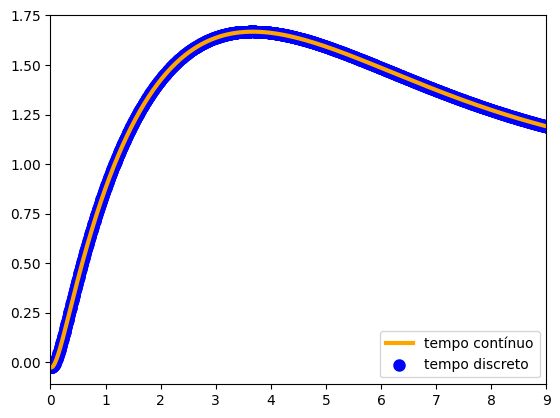

In [49]:
time, response = ctl.step_response(G_feedback)
plt.plot(time, response, color='orange', linewidth=3, label='tempo contínuo')

time, response = ctl.step_response(G_z_feedback)
plt.scatter(time, response, color='blue', linewidth=3, label='tempo discreto')

plt.xlim([0, 9])
plt.legend()
plt.show()

# COMPARANDO A RESPOSTA DO CONTROLADOR

- Passando os vetores dos coeficientes do numerador e denominador para uma string que é a própria função do sistema discretizada

In [50]:
num, den = ctl.tfdata(C_z)
num = np.squeeze(num)
den = np.squeeze(den)

num = num/den[0]
den = den/den[0]

print(num)
print(den)

[-3.47145335  7.2182522  -3.7466161 ]
[ 1.         -1.95121951  0.95121951]


- Printando a saída de forma a ser entendida por uma máquina de baixo nível

In [51]:
out = ''

for i in range(0, len(num)):
    out += f'{num[i]}*X_n{i} + '

for i in range(1, len(den)):
    out += f'+ {-1*den[i]}*Y_n{i}'

out = out.replace('X_n0', 'X_n').replace('+ +', '+').replace('+ -', '-')
print(out + ';')

-3.471453350180675*X_n + 7.218252198509127*X_n1 -3.74661609977381*X_n2 + 1.951219512195122*Y_n1-0.951219512195122*Y_n2;


In [52]:
Y_n1 = Y_n2 = Y_n3 = 0
X_n1 = X_n2 = X_n3 = 0

def computeController(inputValue, setpoint):
    global Y_n1, Y_n2, Y_n3
    global X_n1, X_n2, X_n3

    X_n =  setpoint - inputValue
    Y_n = eval(out)

    X_n3 = X_n2
    X_n2 = X_n1
    X_n1 = X_n

    Y_n3 = Y_n2
    Y_n2 = Y_n1
    Y_n1 = Y_n
    return Y_n

- Comparando os dados contínuo e digital de forma gráfica

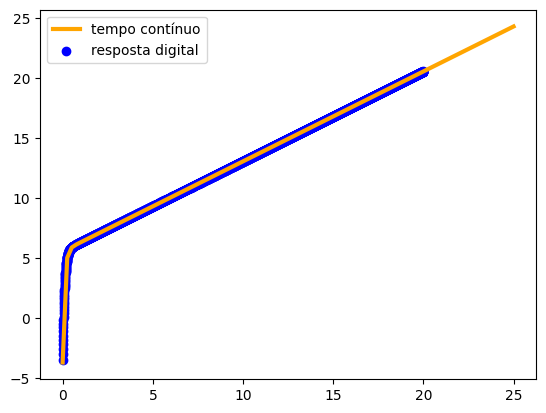

In [53]:
time, response = ctl.step_response(C)
plt.plot(time, response, color='orange', linewidth=3, label='tempo contínuo')

Y_n1 = Y_n2 = Y_n3 = 0
X_n1 = X_n2 = X_n3 = 0

time     = np.arange(0, 20, T)
response = [computeController(1, 2) for i in time] # degrau (erro 1 é a entrada)
plt.scatter(time, response, color='blue', label='resposta digital')

# PLOTANDO OS GRÁFICOS
plt.legend()
plt.show()

# TESTANDO A RESPOSTA
- Se o erro é positivo, o controlador atua aumentando a saída do sistema

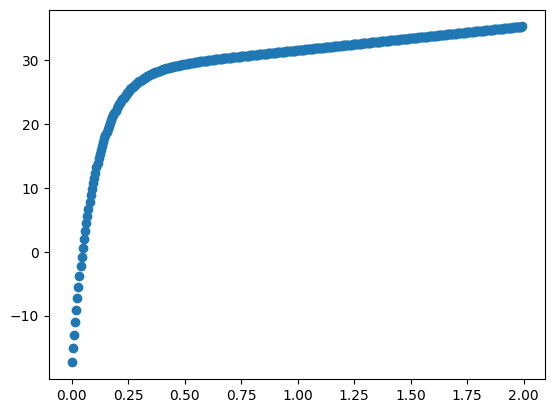

In [54]:
inputValue = 5
setpoint   = 10

Y_n1 = Y_n2 = Y_n3 = 0
X_n1 = X_n2 = X_n3 = 0

time     = np.arange(0, 2, T)
response = [computeController(inputValue, setpoint) for i in time] 
plt.scatter(time, response)

- Se o erro é negativo, o controlador atua diminuindo a saída do sistema

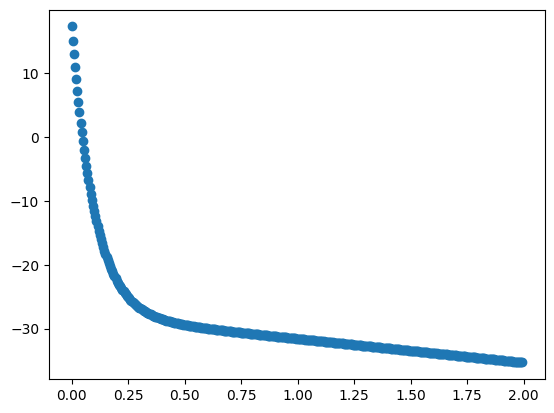

In [55]:
inputValue = 15
setpoint   = 10

Y_n1 = Y_n2 = Y_n3 = 0
X_n1 = X_n2 = X_n3 = 0

time     = np.arange(0, 2, T)
response = [computeController(inputValue, setpoint) for i in time] 
plt.scatter(time, response)

- Se o erro é zero, o não atua e mantém a saída fixa

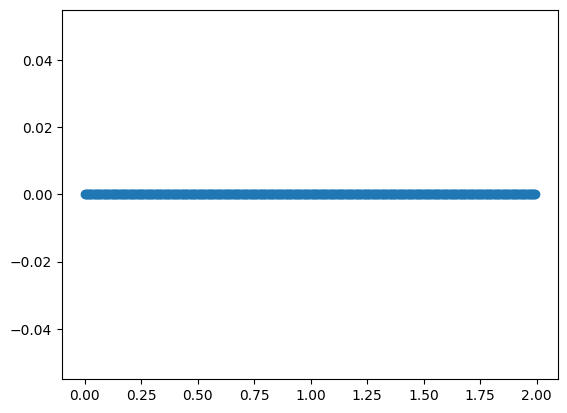

In [56]:
inputValue = 10
setpoint   = 10

Y_n1 = Y_n2 = Y_n3 = 0
X_n1 = X_n2 = X_n3 = 0

time     = np.arange(0, 2, T)
response = [computeController(inputValue, setpoint) for i in time] 
plt.scatter(time, response)